Dataset Overview:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species species_name  
0        0       setosa  
1        0       setosa  
2        0       setosa  
3        0       setosa  
4        0       setosa  

Dataset shape: (150, 6)
Missing values: 0
Missing values per column:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
species_name         0
dtype: int64

Model Performance:
Accuracy: 0.9667
Precision: 0.9697
Recall: 0.9667

Detailed Classification Report:
              precision    

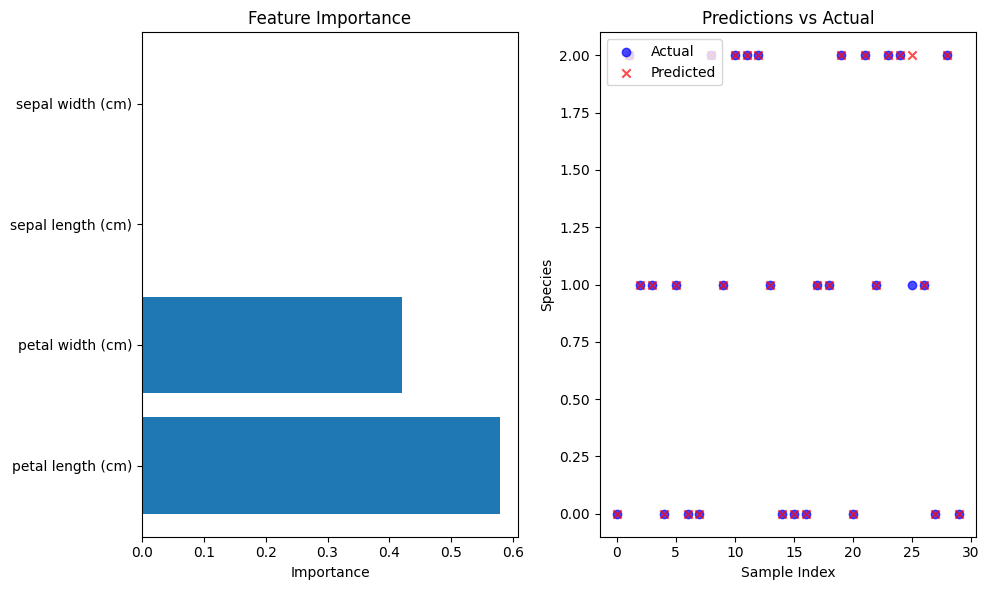

In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features: sepal length, sepal width, petal length, petal width
y = iris.target  # Target: species (0: setosa, 1: versicolor, 2: virginica)

# Create DataFrame for better visualization
df = pd.DataFrame(X, columns=iris.feature_names)
df['species'] = y
df['species_name'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

print("Dataset Overview:")
print(df.head())
print(f"\nDataset shape: {df.shape}")
print(f"Missing values: {df.isnull().sum().sum()}")

# Data preprocessing
# Check for missing values (Iris dataset typically has none)
print(f"Missing values per column:\n{df.isnull().sum()}")

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42, max_depth=3)
dt_classifier.fit(X_train, y_train)

# Make predictions
y_pred = dt_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print(f"\nModel Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

print(f"\nDetailed Classification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

# Visualize feature importance
feature_importance = pd.DataFrame({
    'feature': iris.feature_names,
    'importance': dt_classifier.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.barh(feature_importance['feature'], feature_importance['importance'])
plt.title('Feature Importance')
plt.xlabel('Importance')

# Visualize predictions vs actual
plt.subplot(1, 2, 2)
plt.scatter(range(len(y_test)), y_test, alpha=0.7, label='Actual', color='blue')
plt.scatter(range(len(y_pred)), y_pred, alpha=0.7, label='Predicted', color='red', marker='x')
plt.title('Predictions vs Actual')
plt.xlabel('Sample Index')
plt.ylabel('Species')
plt.legend()
plt.tight_layout()
plt.show()